In [73]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight
from sklearn import metrics
import sys
import os
from math import log
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Tweakable Parameters**

In [74]:
# Image size (height x width)
ih = 64
iw = 64

# Grayscale or RGB
ch = 'grayscale'

# Batch size
batch_size = 64

# Number of epochs
epoch_t = 25

# Where computation is performed: Kaggle (0) or Local (1)
cenv = 1

# Division of the training vs. test set (in %)
test_size = 0.2

# Weight factor (1 is perfect reverse)
wf = 0.5

In [75]:
im_si = (ih, iw)

if(ch == 'rgb'):
    chnum = 3
elif(ch == 'grayscale'):
    chnum = 1

In [76]:
if cenv == 1:
    file_exists = []
    vnum = 1
    dir = "C:/Users/Max/Documents/GitHub/malimg_dataset"
    for files in os.listdir(dir):
        if "gibert-cnn" in files:
            try:
                vnum = max(vnum, int(files[-3:]))
            except: 
                continue
            new_vnum = vnum + 1
            file_exists.append(True)
        else: 
            file_exists.append(False)
    # If this is the first notebook you want to save, a new folder will be created with version #001
    if sum(file_exists) == 0:
        new_vnum = 1
        print("No matches found")

    else: 
        print(f"{sum(file_exists)} matches(es) found")
        print("--------------")

    # Print new folder name
    print(f"New folder name: gibert-cnn-local-v{new_vnum:03}")
    print("--------------")
    
    # Create new folder with the name of the notebook and the version number
    new_dir = f"/Users/Max/Documents/GitHub/malimg_dataset/gibert-cnn-local-v{new_vnum:03}"
    os.makedirs(new_dir)

1 matches(es) found
--------------
New folder name: gibert-cnn-local-v006
--------------


Retrieve Data

In [77]:
path_root = "C:/Users/Max/Documents/image_data/malimg_paper_dataset_imgs"

In [78]:
t_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=test_size
    )

In [79]:
train = t_datagen.flow_from_directory(
    directory     = path_root, 
    color_mode    = ch, 
    target_size   = (ih,iw), 
    batch_size    = batch_size,
    interpolation = 'bicubic',
    subset='training',
    seed = 123
)

Found 7481 images belonging to 25 classes.


In [80]:
v_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=test_size)

In [81]:
test = v_datagen.flow_from_directory(
    directory     = path_root, 
    color_mode    = ch, 
    target_size   = (ih,iw), 
    batch_size    = batch_size,
    interpolation = 'bicubic',
    subset='validation',
    seed = 123,
    shuffle = False
)

Found 1858 images belonging to 25 classes.


In [82]:
display = t_datagen.flow_from_directory(
    directory     = path_root, 
    color_mode    = ch, 
    target_size   = (ih,iw), 
    batch_size    = 50,
    interpolation = 'bicubic',
    subset='training',
    seed = 123,
    shuffle = True
)

Found 7481 images belonging to 25 classes.


In [83]:
num_samples = train.samples

In [84]:
train.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

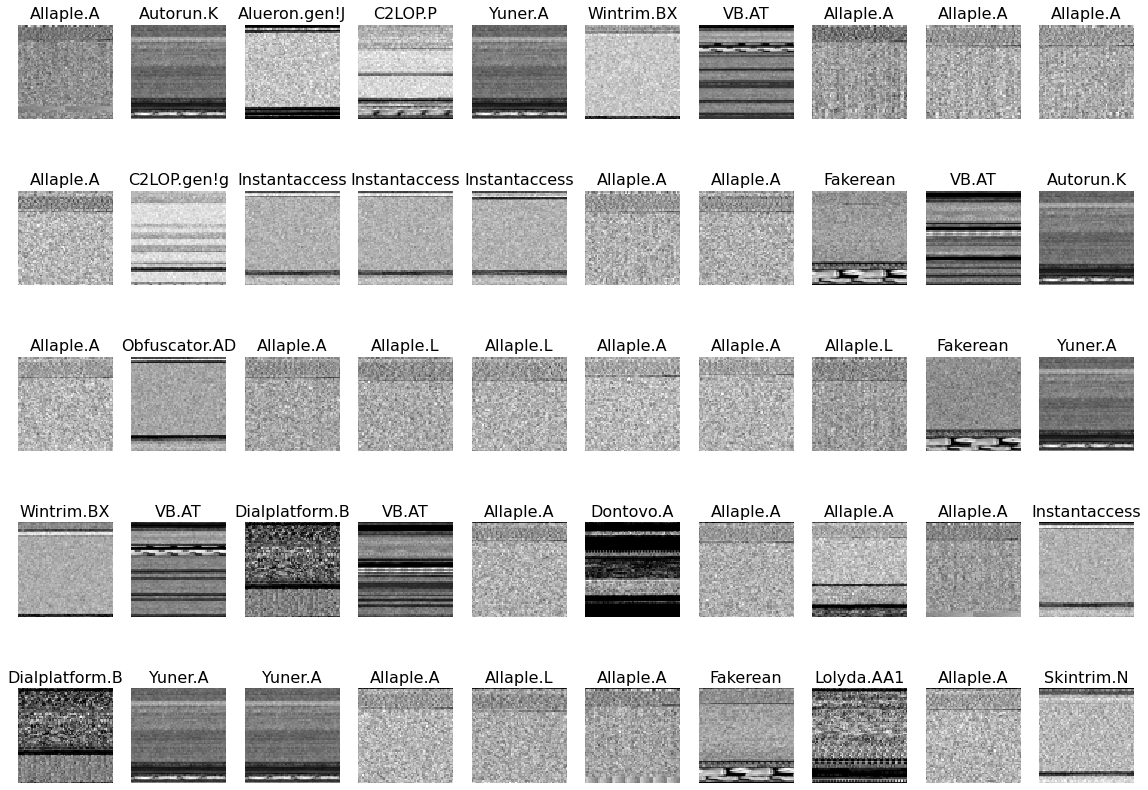

In [85]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        if (ims.shape[-1] != chnum):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(display.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], cmap = 'gray',interpolation=None if interp else 'none')

imgs, labels = display.next()
plots(imgs, titles = labels)

In [86]:
imgs.shape

(50, 64, 64, 1)

In [87]:
img, label = display.next()

In [88]:
display.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [89]:
perc = (sum(to_categorical(train.classes))/train.classes.shape[0])*100

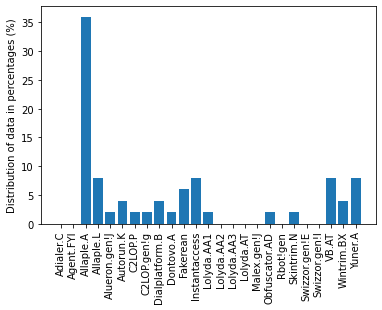

In [90]:
perc = (sum(labels)/labels.shape[0])*100
plt.xticks(rotation='vertical')
plt.bar(list(display.class_indices.keys()),perc)
plt.ylabel('Distribution of data in percentages (%)')

if cenv == 0:
    plt.savefig("multi_data_dist.png", bbox_inches = 'tight')
if cenv == 1:
    plt.savefig(f"{new_dir}/multi_data_dist.png", bbox_inches = 'tight')

# CNN MODEL

In [91]:
import keras
from keras.models import Sequential, Input, Model, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, LeakyReLU, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [92]:
num_classes = max(train.labels) + 1
print("The number of classes in our dataset: ", num_classes)

The number of classes in our dataset:  25


In [93]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(50, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=(ih,iw,chnum)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2), strides =1))
    Malware_model.add(BatchNormalization())
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Conv2D(70, (3, 3), activation='relu'))
    
    Malware_model.add(MaxPooling2D(pool_size=(2, 2), strides =1))
    Malware_model.add(BatchNormalization())
    Malware_model.add(Conv2D(70, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2), strides =1))
    Malware_model.add(BatchNormalization())
    
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(256, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [94]:
Malware_model = malware_model()
Malware_model.summary() # Overview of the CNN model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 50)        1300      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 59, 59, 50)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 59, 59, 50)        200       
_________________________________________________________________
dropout_6 (Dropout)          (None, 59, 59, 50)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 57, 57, 70)        31570     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 56, 56, 70)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 56, 56, 70)       

In [95]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
if cenv == 0:
    checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
if cenv == 1:
    checkpoint = ModelCheckpoint(f'{new_dir}/model.h5', verbose=1, save_best_only=True)


In [96]:
history = Malware_model.fit(
    train,
    steps_per_epoch=num_samples//batch_size,
    epochs=epoch_t,
    callbacks = [anne, checkpoint],
    validation_data=test,
    validation_steps=test.samples//batch_size) # The actual computation of the CNN

Epoch 1/25
116/116 [==============================] - 14s 116ms/step - loss: 8.2556 - accuracy: 0.8982 - val_loss: 156.0649 - val_accuracy: 0.3173

Epoch 00001: val_loss improved from inf to 156.06494, saving model to /Users/Max/Documents/GitHub/malimg_dataset/gibert-cnn-local-v006\model.h5
Epoch 2/25
116/116 [==============================] - 13s 111ms/step - loss: 2.7914 - accuracy: 0.9532 - val_loss: 149.1492 - val_accuracy: 0.0124

Epoch 00002: val_loss improved from 156.06494 to 149.14915, saving model to /Users/Max/Documents/GitHub/malimg_dataset/gibert-cnn-local-v006\model.h5
Epoch 3/25
116/116 [==============================] - 13s 109ms/step - loss: 1.6275 - accuracy: 0.9598 - val_loss: 160.4672 - val_accuracy: 0.3173

Epoch 00003: val_loss did not improve from 149.14915
Epoch 4/25
116/116 [==============================] - 13s 109ms/step - loss: 4.8498 - accuracy: 0.9391 - val_loss: 391.5905 - val_accuracy: 0.1056

Epoch 00004: val_loss did not improve from 149.14915
Epoch 5/

# Evaluating performance

In [97]:
from sklearn.metrics import f1_score, matthews_corrcoef, accuracy_score
from prettytable import PrettyTable, MSWORD_FRIENDLY

In [98]:
if cenv == 0:
    best_model = load_model("/kaggle/working/model.h5")
if cenv == 1:
    best_model = load_model(f"{new_dir}/model.h5")

In [99]:
scores = best_model.evaluate(test, steps = test.samples//batch_size) # Testing the CNN on the test set
print(f"Overall CNN Accuracy: {scores[1]}\n(The number of correct predictions divided by the number of total predictions)")

29/29 [==============================] - 3s 84ms/step - loss: 5.5322 - accuracy: 0.9423
Overall CNN Accuracy: 0.9423491358757019
(The number of correct predictions divided by the number of total predictions)


In [100]:
t = PrettyTable(['Metric', 'Performance'])
t.add_row(['Valididation accuracy', round(scores[1],4)])
t.add_row(['Validation loss', round(scores[0],4)])
t.header = True
t.align = "l"
t.title = "Performance of multi-class classification - CNN"
print(t)

+-------------------------------------------------+
| Performance of multi-class classification - CNN |
+-------------------------------+-----------------+
| Metric                        | Performance     |
+-------------------------------+-----------------+
| Valididation accuracy         | 0.9423          |
| Validation loss               | 5.5322          |
+-------------------------------+-----------------+


In [101]:
# Saving PrettyTable
table = t.get_string()

if cenv == 0:
    with open('multi_performance_table.txt', 'w') as f:
        f.write(table)
if cenv == 1:
    with open(f'{new_dir}/multi_performance_table.txt', 'w') as f:
        f.write(table)

# Evaluating overfitting and other model performance measures

In [102]:
def eval_metric(model, history, metric_name):
    '''
    Function to evaluate a trained model on a chosen metric. 
    Training and validation metric are plotted in a
    line chart for each epoch.
    
    Parameters:
        history : model training history
        metric_name : loss or accuracy
    Output:
        line chart with epochs of x-axis and metric on
        y-axis
    '''
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]
    e = range(1, epoch_t + 1)
    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.xlabel('Epoch number')
    plt.ylabel(metric_name)
    plt.title('Comparing training and validation ' + metric_name + ' for ' + model.name)
    plt.legend()
    if cenv == 0:
        plt.savefig(f"cnn_model_{metric_name}.png", bbox_inches = 'tight')
    if cenv == 1:
        plt.savefig(f"{new_dir}/cnn_model_{metric_name}.png", bbox_inches = 'tight')

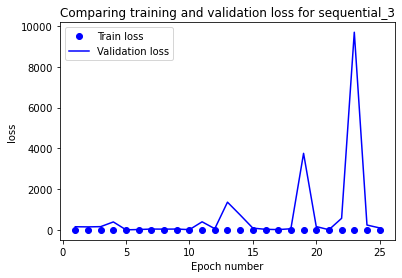

In [103]:
eval_metric(Malware_model, history, 'loss')

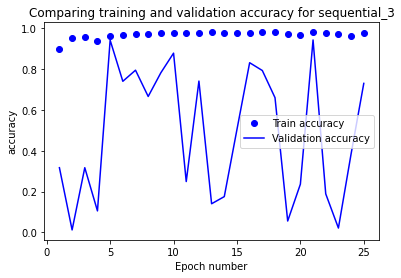

In [104]:
eval_metric(Malware_model, history, 'accuracy')

# Confusion Matrix
Analysing the results

In [105]:
y_pred = np.argmax(best_model.predict(test, steps= test.samples//batch_size+1), axis=-1)
y_pred

array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64)

In [106]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())

In [107]:
report = metrics.classification_report(true_classes, y_pred, target_names=class_labels)

C:\Users\Max\anaconda3\envs\master_thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Max\anaconda3\envs\master_thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Max\anaconda3\envs\master_thesis\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
print(report)

                precision    recall  f1-score   support

     Adialer.C       1.00      1.00      1.00        24
     Agent.FYI       1.00      0.96      0.98        23
     Allaple.A       1.00      1.00      1.00       589
     Allaple.L       0.95      1.00      0.97       318
 Alueron.gen!J       0.95      1.00      0.97        39
     Autorun.K       0.00      0.00      0.00        21
       C2LOP.P       0.45      0.79      0.58        29
   C2LOP.gen!g       0.91      0.75      0.82        40
Dialplatform.B       1.00      0.94      0.97        35
     Dontovo.A       0.97      1.00      0.98        32
      Fakerean       1.00      0.93      0.97        76
 Instantaccess       1.00      1.00      1.00        86
    Lolyda.AA1       0.89      1.00      0.94        42
    Lolyda.AA2       0.92      0.97      0.95        36
    Lolyda.AA3       1.00      1.00      1.00        24
     Lolyda.AT       1.00      0.94      0.97        31
   Malex.gen!J       0.93      0.96      0.95  

In [109]:
c_matrix = metrics.confusion_matrix(true_classes, y_pred)
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    if cenv == 0:
        plt.savefig("multi_class_cmatrix.png", bbox_inches = 'tight')
    if cenv == 1:
        plt.savefig(f"{new_dir}/multi_class_cmatrix.png", bbox_inches = 'tight')

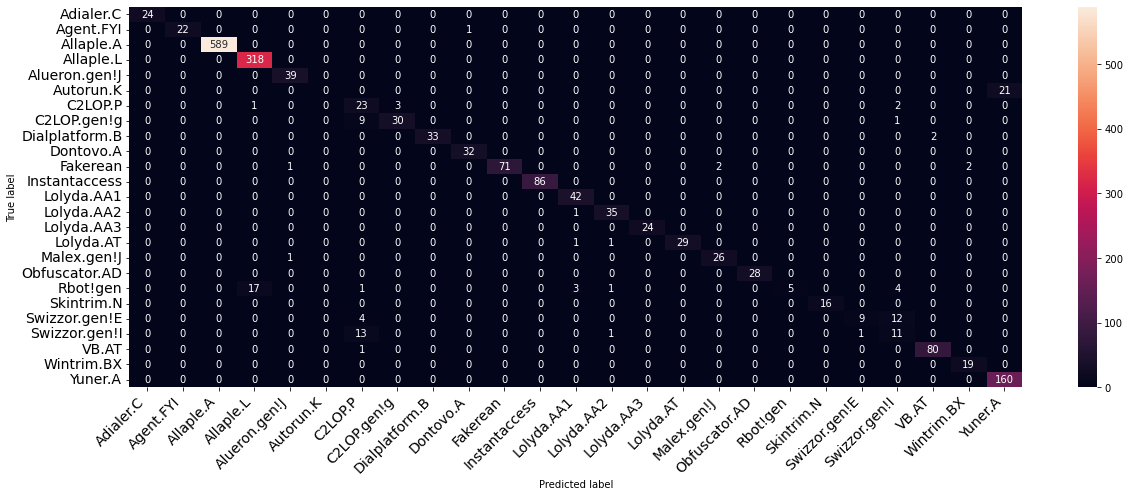

In [110]:
class_names= train.class_indices.keys()
confusion_matrix(c_matrix, class_labels, figsize = (20,7), fontsize=14)